In [1]:
# Getting Python ready
from scipy.stats import norm
from scipy.special import comb
import matplotlib.pyplot as plt
import numpy as np
#from ipynb.fs.full.Bernoulli import aBernoulliExperiment
import math
import textwrap
import ipynb.fs.defs.Bernoulli as bern
import ipynb.fs.defs.Binomial as binom


We will perform one experiment whose outcome is governed by the Poisson ($\alpha$) distribution. We will use the poisson() function provided by np.random. The lam parameter of the function is the same as $\alpha$ in the book.

In [ ]:
#From the help for the function: For events with an expected separation \lambda the Poisson distribution f(k; \lambda) describes the probability of k events occurring within the observed interval \lambda.

# lam is alpha in the book

np.random.default_rng(8946729)

numberOfExperiments = 1
alpha = 1

outcomesOfExperiments = np.ndarray((1,numberOfExperiments))

outcomesOfExperiments = np.random.poisson(lam = alpha, size=outcomesOfExperiments.shape)

print("The outcomes of experiments are ", outcomesOfExperiments)

We will perform multiple experiments, each of whose outcome is governed by the Poisson ($\alpha$) distribution. Note that the more the number of experiments a frequentist performs, the more will the histogram of outcomes look like the PMF of the Poisson distribution.

We will use the poisson() function provided by np.random. The lam parameter of the function is the same as $\alpha$ in the book.

In [ ]:
#From the help for the function: For events with an expected separation \lambda the Poisson distribution f(k; \lambda) describes the probability of k events occurring within the observed interval \lambda.

# lam is alpha in the book

np.random.default_rng(8946729)

numberOfExperiments = 1000000
alpha = 1

outcomesOfPoissonExperiments = np.ndarray((1,numberOfExperiments))

outcomesOfPoissonExperiments = np.random.poisson(lam = alpha, size=outcomesOfPoissonExperiments.shape)

print("The outcomes of experiments are ", outcomesOfPoissonExperiments)

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, sharex=False, figsize=(16,4))
#histVal = ax1.hist(outcomeOfBinomialExp + 1, bins=range(0,v_binomial_n+1), density=True, align='left')

histVal = np.histogram(outcomesOfPoissonExperiments, bins=range(0,np.max(outcomesOfPoissonExperiments)+2), density=False)#, rwidth=1)

print("The histogram values are:", histVal)

ax.bar(histVal[1][0:-1], histVal[0], width = 0.01)
# ax1.set_xscale("linear")
ax.set_xlabel("Poisson Experiment Outcome (Number of arrivals in the interval)")
ax.set_ylabel(textwrap.fill("Frequency of Outcomes", 100))


plt.tight_layout(h_pad = 5.0)

We will perform multiple experiments for different settings of lam ($\alpha$ in the book).

In [ ]:
#From the help for the function: For events with an expected separation \lambda the Poisson distribution f(k; \lambda) describes the probability of k events occurring within the observed interval \lambda.

# lam is alpha in the book

np.random.default_rng(8946729)

numberOfExperiments = 5000000 * 3
alpha = [[0.5, 2, 4, 64]]

outcomesOfPoissonExperiments = np.ndarray((np.shape(alpha)[1],numberOfExperiments))

alphaArray = np.ones((np.shape(alpha)[1],numberOfExperiments))

print("The shapes are ", alphaArray.shape, outcomesOfPoissonExperiments.shape)

alphaArray = alphaArray * np.transpose(alpha)

print(alphaArray)

outcomesOfPoissonExperiments = np.random.poisson(lam = alphaArray, size=np.shape(outcomesOfPoissonExperiments))

print("The outcomes of experiments are ", outcomesOfPoissonExperiments.shape, outcomesOfPoissonExperiments)

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=2, sharex=False, figsize=(15,10))

#plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9)

plt.tight_layout(pad = 3.0, w_pad=10.0,h_pad=5.0)

# fig.set_label("No of Trials of Bern Exp is " + str(v_numTrialsInAnExp))
obsIdx = 0
widthArr = [0.05, 0.05, 0.35, 0.35]
#widthArr = [0.01, 0.01, 0.005, 0.0009]
#for rowidx in range(int(np.ceil(v_numRepeats/2))):
for rowidx in range(2):
    for colidx in range(2):
        # print("The outcomes are", frequentists[obsIdx], "obsIdx:", obsIdx)
        histVal = np.histogram(outcomesOfPoissonExperiments[obsIdx], bins=range(0,np.max(outcomesOfPoissonExperiments[obsIdx])+2), density=False)
        # print("The histogram[1] values are:", histVal[1])
        # print("The histogram[0] values are:", histVal[0])

        ax[rowidx][colidx].bar(histVal[1][0:-1], histVal[0]/numberOfExperiments, width = widthArr[obsIdx])
        ax[rowidx][colidx].set_xscale("linear")
        ax[rowidx][colidx].set_xlabel("Poisson Experiment Outcome (Number of arrivals in the interval lam)")
        ax[rowidx][colidx].set_ylabel(textwrap.fill("Frequency of Outcomes", 100))
        ax[rowidx][colidx].set_title("lam = " + str(alpha[0][obsIdx]))
        obsIdx = obsIdx + 1

# plt.subplot_tool()
# plt.show(block=True)

The Poisson $(\alpha)$ distribution can be obtained from a Binomial $(n,p)$ in the limit as $n\to \infty$ with $np = \alpha$. We are fixing both the target Poisson and the Binomial to have the same mean by forcing $np = \alpha$, where $np$ is the mean of the Binomial distribution and $\alpha$ is the mean of the Poisson distribution.

Recall that $\alpha$ can be thought of as a product of rate $\lambda$ of arrivals (or occurances) of events of interest (for example success or failure, arrival of a student in to a classroom, arrival of a packet to a server, and etc.) and the time interval $T$. We have $\alpha = \lambda T$. 

When modeling the number of occurances of events of interest over time $T$, one can alternatively discretize $T$ into $n$ time slots and model whether the event of interest occurs or not in a slot as a Bernoulli $(p)$ RV. We have $n$ Bernoulli RVs and we are interested in their sum. The sum gives the total number of occurances over $n$ slots (time interval $T$). This sum is distributed as a Binomial $(n,p)$ RV. 

What is the limitation of modeling the number of occurances using the Binomial?

We can get around the limitation by fixing $np$, while increasing the number of slots $n$. Thus, we are decreasing the probability $p$ of the event of interest occuruing in a slot, while increasing the number of slots in a manner such that $np$ stays fixed. By doing so, we are shrinking the size of each of the $n$ time slots in the interval $T$. In the limit as $n\to\infty$, the Binomial $(n,p)$ PMF, with $np = \alpha$ approaches the Poisson $(\alpha)$ PMF. This BTW is quite easy to show analytically. Start with the Binomial PMF. Substitute $p=\alpha/n$ and then take the limit $n\to \infty$.



Below we illustrate how the Binomial PMF approaches the Poisson PMF.

In [53]:
rng = np.random.default_rng(8946729)

numberOfExperiments = 100000
# alpha = 1

alpha = 10

outcomesOfPoissonExperiments = np.ndarray((1,numberOfExperiments))
outcomesOfPoissonExperiments = np.random.poisson(lam = alpha, size=(1, numberOfExperiments))

n = np.array([int(1.1 * alpha), int(2 * alpha), int(100 * alpha)])

p = alpha/n

print("The Binomial Probabilities are", p)
print("The num of trials are", n)
print("The product is", n * p)

listOfBinomialExps = []

for j in range(3):
    outcomeOfBinomialExps = np.ndarray((numberOfExperiments,1))

    outcomeOfBinomialExps = binom.aBinomialExperiment(rng, binomialParam_n = n[j], binomialParam_p = p[j], profitLoss_Bern = [1,0], numberOfBinomialExperiments = numberOfExperiments)

    # for i in range(numberOfBinomialExps):
    #     outcomeOfBinomialExps[i,:] = aBinomialExperiment(rng, v_binomial_n[j], v_binomial_p, [1,0])

    # print("The outcomes are", outcomeOfBinomialExps)
    listOfBinomialExps.append(outcomeOfBinomialExps)

The Binomial Probabilities are [0.90909091 0.5        0.01      ]
The num of trials are [  11   20 1000]
The product is [10. 10. 10.]


The histogram[1] values are: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26]
The histogram[0] values are: [    3    33   239   763  1885  3732  6273  9056 11355 12522 12625 11299
  9391  7253  5242  3494  2135  1285   704   363   189    86    42    20
    10     1]
The histogram[1] values are: [ 0  1  2  3  4  5  6  7  8  9 10 11 12]
The histogram[0] values are: [    0     0     0     0     1    14   150  1189  5818 19293 38585 34950]
The histogram[1] values are: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
The histogram[0] values are: [    0     1    21    99   430  1486  3704  7544 11927 15901 17807 15891
 11971  7362  3731  1546   447   111    20     1]
The histogram[1] values are: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]
The histogram[0] values are: [    4    36   196   736  1879  3735  6323  8980 11333 12638 12434 11443
  9631  7278  5155  3501  2054  1284   664   367   174 

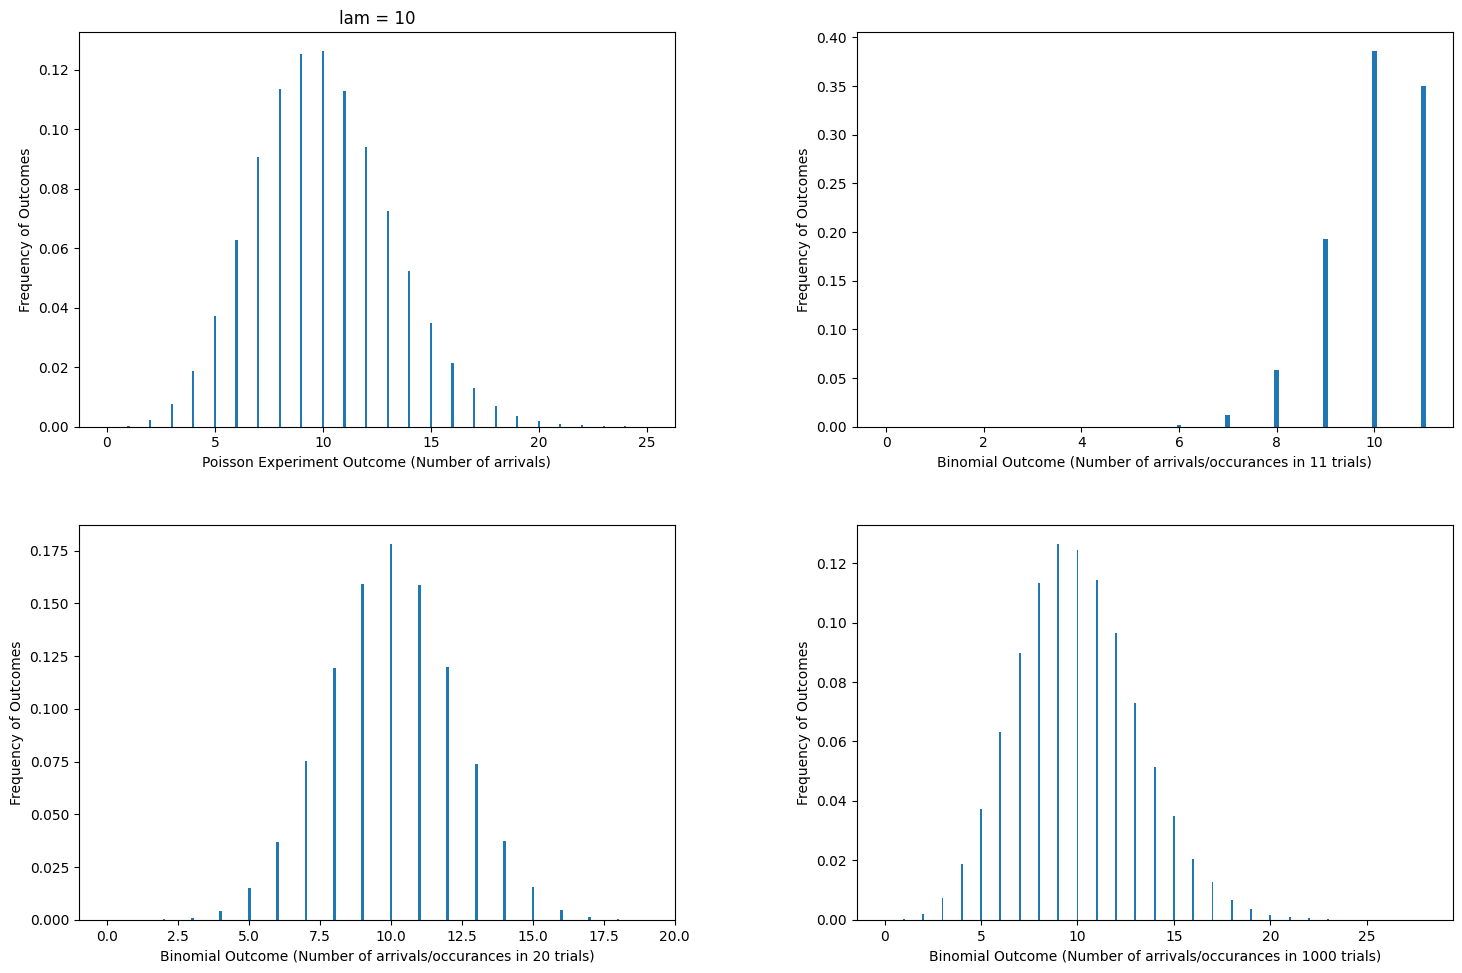

In [54]:
fig, ax = plt.subplots(nrows=2, ncols=2, sharex=False, figsize=(15,10))

#plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9)

plt.tight_layout(pad = 3.0, w_pad=10.0,h_pad=5.0)

# fig.set_label("No of Trials of Bern Exp is " + str(v_numTrialsInAnExp))
obsIdx = 0
#widthArr = [0.05, 0.05, 0.35, 0.35]
widthArr = [0.1, .1, .1, .1]
#for rowidx in range(int(np.ceil(v_numRepeats/2))):
for rowidx in range(2):
    for colidx in range(2):
        # print("The outco[0][obsIdx]mes are", frequentists[obsIdx], "obsIdx:", obsIdx)
        if(obsIdx == 0):
            histVal = np.histogram(outcomesOfPoissonExperiments, bins=range(0,np.max(outcomesOfPoissonExperiments)+2), density=False)
            ax[rowidx][colidx].set_xlabel("Poisson Experiment Outcome (Number of arrivals)")
            ax[rowidx][colidx].set_title("lam = " + str(alpha))
        else:
            # histVal = np.histogram(listOfBinomialExps[obsIdx - 1], bins=range(0,n[obsIdx - 1]+2), density=False)
            histVal = np.histogram(listOfBinomialExps[obsIdx - 1], bins=range(0,int(np.max(listOfBinomialExps[obsIdx - 1]))+2), density=False)
            ax[rowidx][colidx].set_xlabel("Binomial Outcome (Number of arrivals/occurances in " + str(n[obsIdx - 1]) + " trials)")

        print("The histogram[1] values are:", histVal[1])
        print("The histogram[0] values are:", histVal[0])

        ax[rowidx][colidx].bar(histVal[1][0:-1], histVal[0]/numberOfExperiments, width = widthArr[obsIdx])
        ax[rowidx][colidx].set_xscale("linear")
        # ax[rowidx][colidx].set_xlabel("Poisson Experiment Outcome (Number of arrivals in the interval lam)")
        ax[rowidx][colidx].set_ylabel(textwrap.fill("Frequency of Outcomes", 100))
        obsIdx = obsIdx + 1